In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import plotly.express as px #for plotting the scatter plot
import seaborn as sns #for plotting dataset in seaborn
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
  df=pd.read_csv("/content/diamonds.csv")
  print(df.head())

   Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]


In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [ ]:
#check for empty cells
for column in df:
  print("Number of empty cells in {} is {}".format(column,(df[column]=="").sum()))

Number of empty cells in carat is 0
Number of empty cells in cut is 0
Number of empty cells in color is 0
Number of empty cells in clarity is 0
Number of empty cells in depth is 0
Number of empty cells in table is 0
Number of empty cells in price is 0
Number of empty cells in x is 0
Number of empty cells in y is 0
Number of empty cells in z is 0


In [ ]:
#find zero values
for column in df:
  print(("Number of zeros in {} is {}".format(column,(df[column]==0).sum())))

Number of zeros in carat is 0
Number of zeros in cut is 0
Number of zeros in color is 0
Number of zeros in clarity is 0
Number of zeros in depth is 0
Number of zeros in table is 0
Number of zeros in price is 0
Number of zeros in x is 8
Number of zeros in y is 7
Number of zeros in z is 20


In [ ]:
print("Number of rows with 0 value in x is {}".format((df.x==0).sum()))
print("Number of rows with 0 value in y is {}".format((df.y==0).sum()))
print("Number of rows with 0 value in z is {}".format((df.z==0).sum()))
print("Number of null values in the dataframe is {}".format(df.isnull().sum()))

Number of rows with 0 value in x is 8
Number of rows with 0 value in y is 7
Number of rows with 0 value in z is 20
Number of null values in the dataframe is carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [ ]:
df=df.replace({'color' : { 'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1, 'J':0}})
df=df.replace({'cut': {'Ideal':4, 'Premium': 3, 'Very Good': 2, 'Good':1, 'Fair':0}})
df=df.replace({'clarity': {"IF": 8, 'VVS1' :7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1':3, 'SI2': 2, 'I1':1, 'I2':0, 'I3':0}})

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.cut.unique()

array([4, 3, 1, 2, 0])

In [ ]:
df['volume']= df['x']*df['y']*df["z"]

In [ ]:
df=df.drop(['x','y','z'], axis=1)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4,5,2,61.5,55.0,326,38.202030
1,0.21,3,5,3,59.8,61.0,326,34.505856
2,0.23,1,5,5,56.9,65.0,327,38.076885
3,0.29,3,1,4,62.4,58.0,334,46.724580
4,0.31,1,0,2,63.3,58.0,335,51.917250


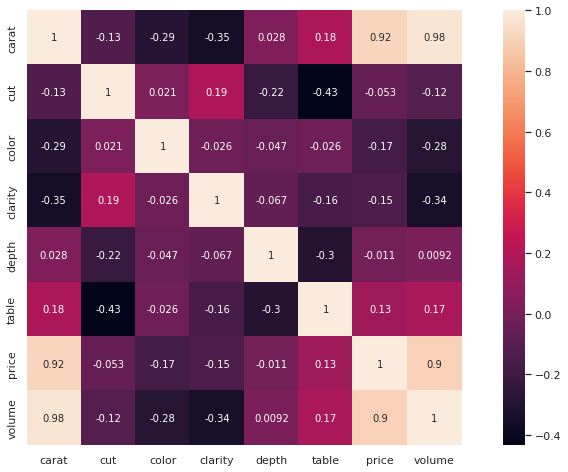

In [ ]:
#multicollinearity
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=corr,square=True,annot=True,cbar=True)

In [ ]:
df=df.drop(['volume'], axis=1)# Dropping the volume column
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,4,5,2,61.5,55.0,326
1,0.21,3,5,3,59.8,61.0,326
2,0.23,1,5,5,56.9,65.0,327
3,0.29,3,1,4,62.4,58.0,334
4,0.31,1,0,2,63.3,58.0,335


In [ ]:
df1=df.copy()

In [ ]:
#Function to find the upper and lower limits to identify and remover outliers
def interQuartile(x):
  percentile25= x.quantile(0.25)
  percentile75=x.quantile(0.75)
  iqr=percentile75-percentile25
  upperLimit= percentile75+1.5*iqr
  lowerLimit= percentile25-1.5*iqr
  return upperLimit, lowerLimit

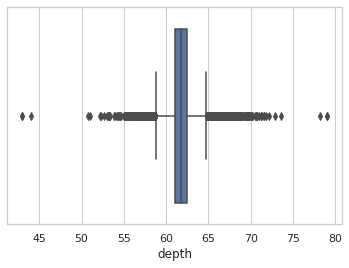

In [ ]:
#removing outliers from depth
#Boxplot to visualize outliers in depth column
sns.boxplot(df['depth'])
upper,lower= interQuartile(df['depth'])
df= df[df['depth'] < upper]
df= df[df['depth']>lower]

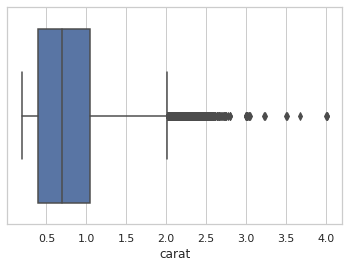

In [ ]:
#removing outliers from carat
#Boxplot to visualize outliers in carat column
sns.boxplot(df['carat'])
upper,lower= interQuartile(df['carat'])
df= df[df['carat'] < upper]
df= df[df['carat']>lower]

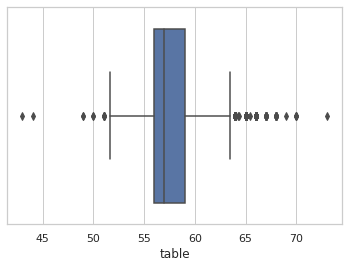

In [ ]:
#removing outliers from table
#Boxplot to visualize outliers in table column
sns.boxplot(df['table'])
upper,lower= interQuartile(df['table'])
df= df[df['table'] < upper]
df= df[df['table']>lower]

In [ ]:
#Implementing Multiple Linear regression using sklearn


In [ ]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [ ]:
model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data

LinearRegression()

In [ ]:
#Predict the value of y based on the test data
y_prediction =  model.predict(x_test)

In [ ]:
PricePredict = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_prediction}) #Create a dataframe to display actual and Predicted value
PricePredict

,Actual price,Predicted price
48596,1995,2789.397842
4443,3618,4635.954660
6657,4093,4803.673166
8943,4498,5213.812962
20719,625,72.713515
...,...,...
33058,814,1263.836627
40886,1176,1153.154034
34036,850,865.826063
17376,612,-1043.167756


In [ ]:
PricePredict=PricePredict[(PricePredict > 0).all(1)]

In [ ]:
MSE= (np.sum((PricePredict['Actual price']-PricePredict['Predicted price'])**2))/(len(y_test)-7-1)
print(MSE)

1134619.5991970813


In [ ]:
np.sqrt(MSE) #Obtain root means square error

1065.1852417289124

In [ ]:
#Obtain the r_squared value
print("r_squared value is ", model.score(x,y))

r_squared value is  0.8995922827848781


In [ ]:
#Obtain root mean square error
sm.tools.eval_measures.rmse(y_test, y_prediction, axis=0) 


1148.7835374775236

In [ ]:
x = sm.add_constant(x)
modelNew = sm.OLS(y, x) 
fitted = modelNew.fit() 

In [ ]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 7.421e+04
Date:                Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                        04:01:05   Log-Likelihood:            -4.1989e+05
No. Observations:               49699   AIC:                         8.398e+05
Df Residuals:                   49692   BIC:                         8.399e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2765.6229    434.664     -6.363      0.000   -3617.570   -1913.676
carat       8865.6610     13.567    653.481      0.000    8839.070    8892.252
cut           60.7175      6.030     10.069      0.000      48.898      72.537
color        316.8024      3.147    100.671      0.000     310.634     322.970
clarity      510.4480      3.336    153.034      0.000     503.910     516.986
depth        -29.8360      5.208     -5.729      0.000     -40.043     -19.629
table        -31.8700      3.042    -10.475      0.000     -37.833     -25.907
==============================================================================
Omnibus:                    14565.012   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73873.943
Skew:                           1.330   Prob(JB):                         0.00
Kurtosis:                       8.347   Cond. No.                     7.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""